In [3]:
import keras
from keras.models import Sequential
from keras.layers import Input,Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D,MaxPooling2D
from keras.optimizers import SGD
from keras.models import Model
import pandas as pd
import numpy as np
import matplotlib.pyplot as mp

Using TensorFlow backend.


In [4]:
train_data = pd.read_csv('data/train.csv')
pixels = train_data.columns[1:]
print(pixels)
X, Y = np.array(train_data[pixels]),np.array(train_data['label'])
m = Y.size
print("Total number of examples in the train set:" , m) 

Index(['pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=784)
Total number of examples in the train set: 42000


In [6]:
train_m = 40000
test_m = m - train_m
print("Train Set examples:" , train_m)
print("Test Set examples:" , test_m)

Train Set examples: 40000
Test Set examples: 2000


In [7]:
X_train,Y_train,X_test,Y_test = X[:train_m,:],Y[:train_m],X[train_m:,:],Y[train_m:]

In [8]:
# Scale the pixel values
X_train = X_train/255
X_test = X_test/255

Y_train = np.squeeze(Y_train)
b = np.zeros((train_m,10))
b[np.arange(train_m),Y_train] = 1
Y_train = b

Y_test = np.squeeze(Y_test)
b = np.zeros((test_m,10))
b[np.arange(test_m),Y_test] = 1
Y_test = b

In [9]:
def reshape(X):
    return X.reshape((28,28))
    

In [15]:
def MNISTModel(input_shape):
    
    #Define the Input Shape
    X_input = Input(input_shape)
    
    # CONV -> CONV -> MAXPOOL -> CONV -> CONV -> MAXPOOL -> DENSE
    for i in range(2):
        X = ZeroPadding2D(padding=(2,2),data_format='channels_last')(X_input)
        X = Conv2D(20,(5,5), strides = (1,1), name = 'conv0' + str(i), data_format = 'channels_last')(X)
        X = BatchNormalization(axis = 3,name = 'bn0' + str(i))(X)
        X = Activation('relu')(X)
    
    X = MaxPooling2D((2,2), name='max_pool0', data_format = 'channels_last')(X)
    
    for i in range(2):
        X = ZeroPadding2D(padding=(2,2),data_format='channels_last')(X_input)
        X = Conv2D(20,(3,3), strides = (1,1), name = 'conv1' + str(i), data_format = 'channels_last')(X)
        X = BatchNormalization(axis = 3,name = 'bn1' + str(i))(X)
        X = Activation('relu')(X)
    
    X = MaxPooling2D((2,2), name='max_pool1', data_format = 'channels_last')(X)
    
    X = Flatten()(X)
    X = Dense(10,activation='softmax',name='fc0')(X)
    
    model = Model(inputs = X_input , outputs = X , name = 'MNISTModel')
    return model

In [16]:
model = MNISTModel((28,28,1))
mnist_model = model.compile(optimizer='adam',loss='categorical_crossentropy',metrics = ['accuracy'])

In [35]:
X_train = X_train.reshape((train_m,28,28,1))
print(X_train.shape , Y_train.shape)
history = model.fit(x=X_train, y=Y_train, batch_size=8, epochs=2)

(40000, 28, 28, 1) (40000, 10)
Epoch 1/2
40000/40000 [==============================] - 43s 1ms/step - loss: 0.0057 - acc: 0.9982
Epoch 2/2
40000/40000 [==============================] - 50s 1ms/step - loss: 0.0047 - acc: 0.9986


2000/2000 [==============================] - 1s 651us/step

Loss = 0.09289032824054448
Test Accuracy = 0.9825


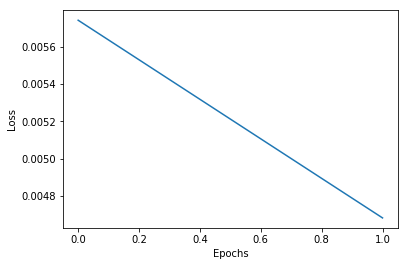

In [36]:
X_test = X_test.reshape((test_m,28,28,1))
preds = model.evaluate(x=X_test,y=Y_test)

print()
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

mp.plot(history.history['loss'])
mp.xlabel('Epochs')
mp.ylabel("Loss")
mp.show()

In [37]:
test_data = np.array(pd.read_csv('data/test.csv'))
test_set_examples = test_data.shape[0]
test_data = test_data.reshape((test_set_examples,28,28,1))
test_data = test_data/255

In [38]:
y_pred_softmax = model.predict(test_data)
y_pred_number = np.argmax(y_pred_softmax,axis = 1)
print(y_pred_number)

[2 0 9 ... 3 9 2]


In [39]:
def show(i):
    print("Prediction:", y_pred_number[i])
    mp.imshow(test_data[i].reshape((28,28)), interpolation='nearest')
    mp.show()

Prediction: 2


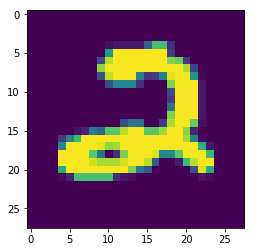

Prediction: 0


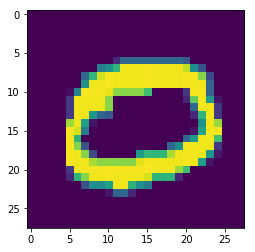

Prediction: 9


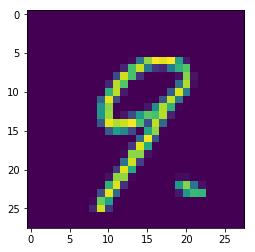

Prediction: 9


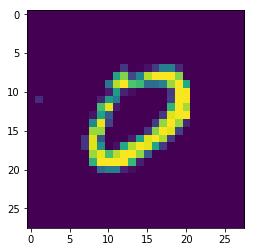

Prediction: 3


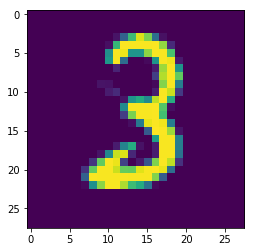

In [40]:
for i in range(5):
    show(i)

### Train Accuracy: 99.96%
### Test Accuracy: 97.64

In [41]:
# Store results in the csv
resultFrame = pd.read_csv('data/test.csv')
resultFrame['label'] = y_pred_number
resultFrame.to_csv('data/results.csv')